In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

from sklearn.decomposition import NMF, PCA

from scipy.sparse import *
from scipy.io import mmread

# Import auryn tools
sys.path.append(os.path.expanduser("/usr/local/auryn/tools/python/"))
from auryntools import *

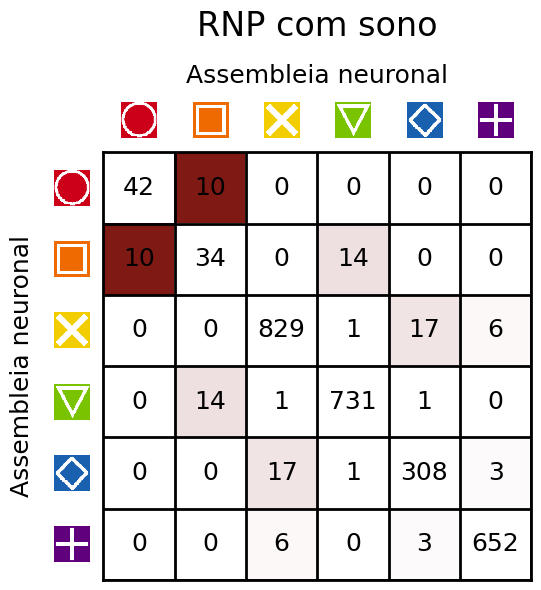

In [3]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# Base old
matrix = np.array([[796, 791,   2,   0,   2,   0],
       [791, 920,   7,   0,   1,   0],
       [  2,   7, 733,   4,   2,   4],
       [  0,   0,   4, 828,   3,   1],
       [  2,   1,   2,   3, 657,   8],
       [  0,   0,   4,   1,   8, 789]])


# # Sleep 1 new
# matrix = np.array([[128, 125,   0, 126,   1,   0],
#        [125, 646,   0, 646,   0,   5],
#        [  0,   0, 779,   1,   4,  19],
#        [126, 646,   1, 809,   1,   8],
#        [  1,   0,   4,   1, 684,   3],
#        [  0,   5,  19,   8,   3, 700]])

# Sleep 2 new
matrix = np.array([[ 42,  10,   0,   0,   0,   0],
       [ 10,  34,   0,  14,   0,   0],
       [  0,   0, 829,   1,  17,   6],
       [  0,  14,   1, 731,   1,   0],
       [  0,   0,  17,   1, 308,   3],
       [  0,   0,   6,   0,   3, 652]])

title = 'RNP com sono'


# Create a normalized matrix based on difference from diagonal
normalized_matrix = np.zeros_like(matrix, dtype=float)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if i == j:
            normalized_matrix[i,j] = 1
        else:
            normalized_matrix[i,j] = abs(matrix[i,j] - ((matrix[i,i] + matrix[j,j]) / 2.0)) / ((matrix[i,i] + matrix[j,j]) / 2.0)

colors = [(0.5, 0.1, 0.08), (1, 1, 1)]  # Dark Red to White
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = "custom_diverging"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)


plt.figure(figsize=(6,6))
plt.imshow(normalized_matrix, cmap=cm)

fontsize = 18

# Display numbers with increased fontsize
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='white' if normalized_matrix[i, j] < 0.5 else 'black', fontsize=fontsize)

ax = plt.gca()

# Add grid with white color to show borders
positions = np.arange(0, 6, 1)
labels = np.arange(1, 7, 1)
plt.xticks(positions, labels, fontsize=fontsize)
plt.yticks(positions, labels, fontsize=fontsize)
plt.tick_params(axis='both', which='both', length=0, pad=30)  # To hide tick marks
plt.tick_params(axis='x', direction='out', bottom=False, top=True, labelbottom=False, labeltop=True)
ax.set_xticklabels([''] * len(positions))
ax.set_yticklabels([''] * len(positions))

plt.gca().set_xticks(labels - 0.5, minor=True)
plt.gca().set_yticks(labels - 0.5, minor=True)
plt.grid(which='minor', color='black', linestyle='-', linewidth=2)

for spine in ax.spines.values():
    spine.set_linewidth(2)

for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(fontsize)

ax.xaxis.set_label_position('top')
plt.xlabel('Assembleia neuronal', fontsize=fontsize, labelpad=20)
plt.ylabel('Assembleia neuronal', fontsize=fontsize, labelpad=20)

ax.set_title(title, fontsize=24, pad=20)

plt.rcParams["font.family"] = "monospace"

imgs = ['circle.png', 'square.png', 'x.png', 'triangle.png', 'diamond.png', 'plus.png']

for i in positions:
    img = plt.imread(f"./stimuli/{imgs[i]}")
    imagebox = OffsetImage(img, zoom=0.4)  

    abx = AnnotationBbox(imagebox, (i, 0), frameon=False, boxcoords="data", pad=0, box_alignment=(0.5, -1.4))
    aby = AnnotationBbox(imagebox, (0, i), frameon=False, boxcoords="data", pad=0, box_alignment=(2.4, 0.5))

    ax.add_artist(abx)
    ax.add_artist(aby)

# plt.show()
plt.tight_layout()
plt.savefig(f'plots_pdf/{title}.pdf', format='pdf')

In [4]:
a_base = np.array([796, 920, 733, 828, 657, 789])
a_sleep = np.array([42, 34, 829, 731, 308, 652])

print(np.mean(a_base), np.mean(a_sleep))



787.1666666666666 432.6666666666667


In [5]:
mean_sleep = np.array([[1.09151139, 0.97902813, 0.42200661, 0.63198715, 0.05697346, 0.31170979],
[0.91746032, 1.07810458, 0.40128669, 0.71574707, 0.04772727, 0.21273006],
[0.168     , 0.26776471, 1.61716767, 0.28945554, 0.15475325, 0.048     ],
[0.12825397, 0.81372549, 0.4878649,  1.31923393, 0.25722944, 0.24466258],
[0.20408163, 0.44509804, 0.65957838, 0.56378086, 1.15219542, 0.22959392],
[0.08911565, 0.12577031, 0.15225458, 0.14384731, 0.06555349, 2.45216185]])*10

mean_base = np.array([
[1.36507538, 1.30139887, 0.14265378, 0.39691241, 0.02088545, 0.00920262],
[1.55914573, 1.50750725, 0.03049568, 0.15924316, 0.12629122, 0.07949303],
[0.50451395, 0.49296852, 1.85992379, 0.10414793, 0.02176035, 0.17520213],
[0.39335966, 0.38035714, 0.02198402, 1.71360421, 0.02809306, 0.10911642],
[0.39992672, 0.38550725, 0.02584129, 0.33132045, 1.68673262, 0.31782847],
[0.06217115, 0.06120205, 0.01828104, 0.14726485, 0.12634972, 2.24684262],
])*10


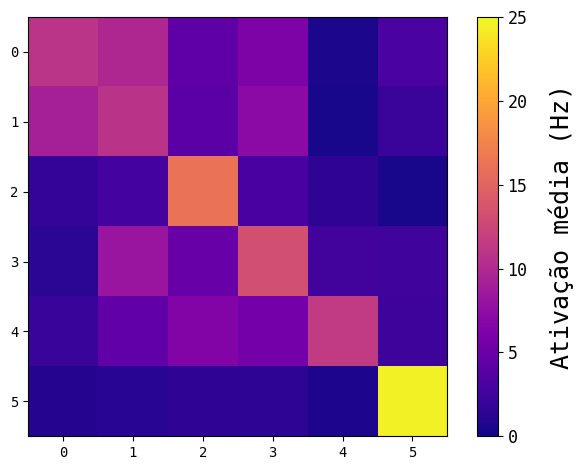

In [37]:
from matplotlib.colors import Normalize

# norm = Normalize(vmin=0, vmax=25)  

# plt.figure(figsize=(6,6))
# # plt.imshow(mean_base, cmap='plasma', norm=norm)
plt.imshow(mean_sleep, cmap='plasma', norm=norm)

# title = 'RNP com sono'

# fontsize = 18

# ax = plt.gca()

# # Add grid with white color to show borders
# positions = np.arange(0, 6, 1)
# labels = np.arange(1, 7, 1)
# plt.xticks(positions, labels, fontsize=fontsize)
# plt.yticks(positions, labels, fontsize=fontsize)
# plt.tick_params(axis='both', which='both', length=0, pad=30)  # To hide tick marks
# plt.tick_params(axis='x', direction='out', bottom=False, top=True, labelbottom=False, labeltop=True)
# ax.set_xticklabels([''] * len(positions))
# ax.set_yticklabels([''] * len(positions))

# plt.gca().set_xticks(labels - 0.5, minor=True)
# plt.gca().set_yticks(labels - 0.5, minor=True)
# plt.grid(which='minor', color='black', linestyle='-', linewidth=2)

# for spine in ax.spines.values():
#     spine.set_linewidth(2)

# for label in ax.xaxis.get_ticklabels():
#     label.set_fontsize(fontsize)

# ax.xaxis.set_label_position('top')
# plt.xlabel('Estímulo', fontsize=fontsize, labelpad=20)
# plt.ylabel('Assembleia neuronal', fontsize=fontsize, labelpad=20)

# ax.set_title(title, fontsize=24, pad=20)

# plt.rcParams["font.family"] = "monospace"

# imgs = ['circle.png', 'square.png', 'x.png', 'triangle.png', 'diamond.png', 'plus.png']

# for i in positions:
#     img = plt.imread(f"./stimuli/{imgs[i]}")
#     imagebox = OffsetImage(img, zoom=0.4)  

#     abx = AnnotationBbox(imagebox, (i, 0), frameon=False, boxcoords="data", pad=0, box_alignment=(0.5, -1.4))
#     aby = AnnotationBbox(imagebox, (0, i), frameon=False, boxcoords="data", pad=0, box_alignment=(2.4, 0.5))

#     ax.add_artist(abx)
#     ax.add_artist(aby)

# ax.set_visible(False)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Ativação média (Hz)', size=fontsize, labelpad=15)
cbar.set_ticks([0, 5, 10, 15, 20, 25])


# plt.show()
plt.tight_layout()
# plt.savefig(f'plots_pdf/{title}_atv.pdf', format='pdf')
plt.savefig(f'plots_pdf/atv_colorbar.pdf', format='pdf')

# Find low rank structure in spiking activity

In [7]:
# num_mpi_ranks = 4 # the number of sims you used in parallel
# datadir = os.path.expanduser("../data/sim_base")
# prefix = "rf4"

# number_neurons = 4096
# number_stimuli = 6
# time_range = 2400
# bin_size = 100e-3

In [8]:
# # Opens stim file
# stimfile = np.loadtxt("%s/%s.0.stimtimes"%(datadir,prefix))
# stimtimes = np.zeros(len(stimfile))
# stimdata = np.zeros((len(stimfile),number_stimuli))
# for i,row in enumerate(stimfile):
#     t,a,s = row
#     stimtimes[i] = t
#     stimdata[i,int(s)] = a
    
# # Opens spk output files
# spkfiles  = ["%s/%s.%i.e.spk"%(datadir,prefix,i) for i in range(num_mpi_ranks)]
# sfo = AurynBinarySpikeView(spkfiles)

# print("Crunching file ...")
# tm = sfo.t_max 
# t_start = tm-time_range
# t_stop  = tm
# data = sfo.time_binned_spike_counts(t_start,t_stop,bin_size=bin_size, max_neuron_id=number_neurons)